# Läs in kommundata

In [1]:
from random import randint
from data_parsing import DataParser


data = DataParser()
data.laddaKommuner()
print("Slumpmässig kommun: ")
print(data.kommuner[randint(0, 289)])

Slumpmässig kommun: 
Kommunen Eslöv har id 1285 och har som senast totalt 32956 människor som bodde i kommunen. Snittåldern är 43 år, samt hade år 2017 en befolkningstäthet på: 79 människor/km^2


# Läs in bankomatdata

In [2]:
data.laddaBankomater()

print("Slumpmässig bankomat: ")
print(data.bankomater[randint(0, len(data.bankomater) -1 )])
print("Slumpmässig transaktion")
print(data.bankomater[randint(0, len(data.bankomater) - 1)].transaktionsDataSEK[0])

Slumpmässig bankomat: 
Bankomat med id 246401, som finns på addressen Nyhemsgatan 2, i Halmstad kommun. Det finns 127 transaktionsadata registrerade. ÄrUte = True
Slumpmässig transaktion
{'månad': '2014M01', 'antalTransaktioner': 3322, 'omsättning': 3488600}


# Deskriptiv Analys

* Testar slumpmässig bankomat för brainstorming

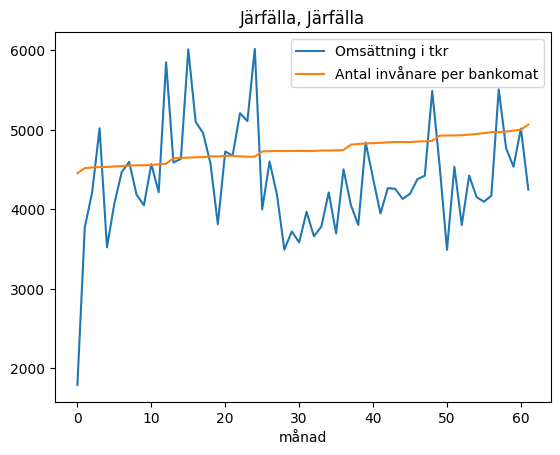

In [3]:
from analysis_models import AnalysModeller


analyser = AnalysModeller(data)

analyser.slumpmässigBankomatOmsättning()

* Testar samband mellan omsättning och befolkningstäthet

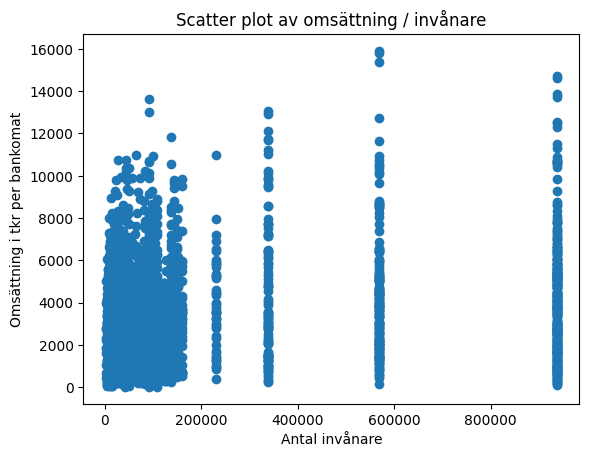

In [4]:
analyser.scatterPlotOmsättningPerInvånare()

# Ser att detta ger oss väldigt lite information. 
* Pelarna är de olika storstäderna, och där är automaterna väldigt spridda. 
* Kan vara relevant att istället kolla på omsättningen per invånare per bankomat

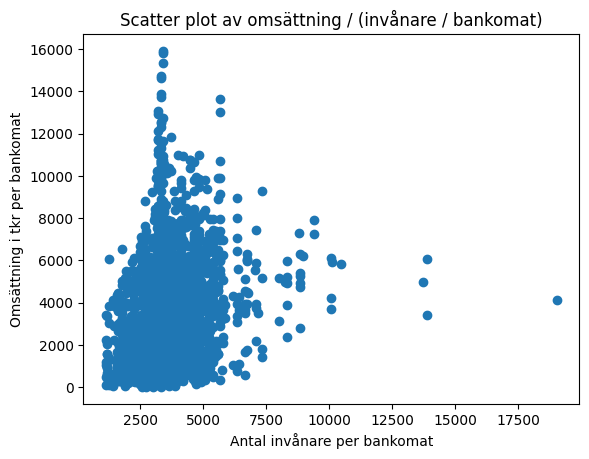

In [5]:
analyser.scatterPlotOmsättningPerInvånarePerBankomat()

# Detta ger lite mer information
* Vi ser att det inte finns ett kontinuerligt samband mellan befolkning per automat och omsättning
* När det finns för få invånare per bankomat finns det relativt liten omsättning
* När det finns för många invånare per bankomat finns det relativt liten omsättning (Vad kan det bero på?)
* I området mellan 2500 - 6000 invånare per bankomat ser vi att det finns som störst omsättning (Varför det?)

Ekerö 341.180794416061 sek/capita 134.0
Knivsta 217.67038049190666 sek/capita 71.4
Markaryd 1604.9564813859956 sek/capita 19.7
Borgholm 1535.2518786264625 sek/capita 16.0
Svalöv 362.49065693430657 sek/capita 37.4
Malmö 1404.4706590225687 sek/capita 2277.0
Dals-Ed 1416.325669642857 sek/capita 6.4
Karlsborg 1629.9025504938818 sek/capita 17.4
Gullspång 1450.1848942598187 sek/capita 16.5
Bengtsfors 1444.6974543816175 sek/capita 10.5
Åmål 1796.252666609779 sek/capita 25.4
Skara 1400.2462699077955 sek/capita 43.8
Munkfors 1539.7876480541456 sek/capita 26.1
Grums 1788.6227848101266 sek/capita 23.6
Filipstad 1470.7698090207232 sek/capita 6.7
Fagersta 1808.439471407221 sek/capita 49.6
Orsa 1444.5954381752701 sek/capita 4.0
Ockelbo 1616.6730288976098 sek/capita 5.5
Krokom 374.59672064503013 sek/capita 2.5
Bjurholm 1465.5822616407982 sek/capita 1.8
Arvidsjaur 1562.0885363357215 sek/capita 1.1


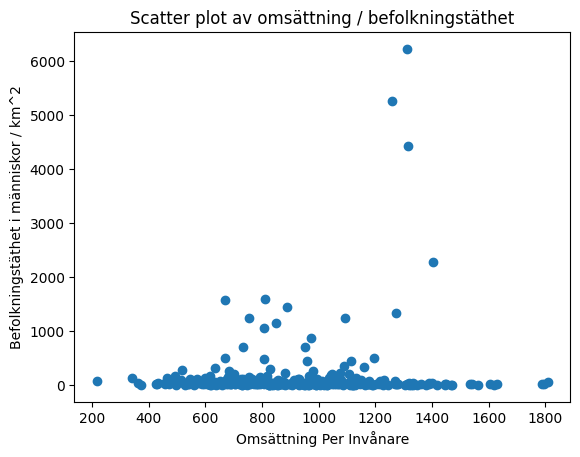

In [6]:
analyser.scatterPlotOmsättningPerInvånareMotBefolkningstäthet()

Vallentuna 8553187.5 97.4
Österåker 6566326.571428572 157.3
Värmdö 9686567.2 104.6
Järfälla 8223620.0 1588.8
Ekerö 9482779.0 134.0
Huddinge 7552007.5 875.0
Botkyrka 13573402.5 491.6
Salem 6962438.666666667 320.7
Haninge 9960184.5 214.5
Tyresö 9859894.857142856 711.4
Upplands-Bro 9360036.666666666 135.4
Nykvarn 9589738.0 76.4
Täby 6010007.111111111 1238.0
Danderyd 7626478.888888889 1239.7
Sollentuna 9917182.923076924 1449.1
Stockholm 8334583.745583039 5260.1
Södertälje 10269420.57142857 195.5
Nacka 6796331.769230769 1155.2
Sundbyberg 9586827.857142856 6229.3
Solna 7094467.4 4434.4
Lidingö 7726844.5 1578.1
Vaxholm 3220640.8 206.5
Norrtälje 6053901.166666667 32.5
Sigtuna 6578247.875 158.3
Nynäshamn 6803109.0 84.1
Håbo 7009994.333333333 158.6
Älvkarleby 9690838.0 43.4
Knivsta 8283664.0 71.4
Heby 6316574.0 12.4
Tierp 6568552.0 13.9
Uppsala 7691229.666666667 111.0
Enköping 7241947.111111111 40.6
Östhammar 5901470.25 15.2
Vingåker 5476262.0 24.3
Gnesta 6339734.5 25.2
Nyköping 5343373.33333333

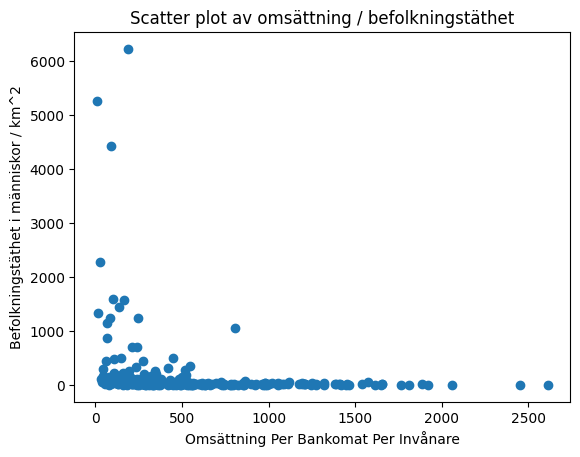

In [7]:
analyser.scatterPlotOmsättningPerAutomatMotBefolkningstäthet()

In [11]:
from collections import defaultdict
import pandas as pd

month = "2022M01"
year = int(month[0:4])

dataDict = defaultdict(dict)

for kommun in data.kommuner:
    try:
        namn = kommun.namn
        befolkning = kommun.data[month]["total"]
        totalOmsättning = kommun.totalOmsättning
        omsättningPerInvånare = kommun.omsättningPerInvånare
        antalBankomater = kommun.antalBankomater
        befolkningstäthet = kommun.befolkningstätheter[year]
        snittÅlder = kommun.snittÅlder
        antalTransaktioner = kommun.totalTransaktionsAntal
        antalTransaktionerPerBankomat = kommun.snittTransaktionsAntal
        genomsnittligTransaktionsStorlek = kommun.totalOmsättning / kommun.totalTransaktionsAntal 
    except: 
        print("oopsie daisy")
    try:
        dataDict[namn] = {
            "Befolkning": befolkning,
            "Total Omsättning": totalOmsättning,
            "Omsättning per Invånare": omsättningPerInvånare,
            "Antal Bankomater": antalBankomater,
            "Befolknigstäthet": befolkningstäthet,
            "Genomsnittlig Ålder": snittÅlder,
            "Antal Transaktioner": antalTransaktioner,
            "Antal Transaktioner Per Bankomat": antalTransaktionerPerBankomat,
            "Genomsnittlig Transaktionsstorlek": genomsnittligTransaktionsStorlek
        }
    except: pass

df = pd.DataFrame(dataDict)
df.to_csv("initialResults.tsv", sep="\t")

display(df)

oopsie daisy


,Upplands Väsby,Vallentuna,Österåker,Värmdö,Järfälla,Ekerö,Huddinge,Botkyrka,Salem,Haninge,...,Kalix,Övertorneå,Pajala,Gällivare,Älvsbyn,Luleå,Piteå,Boden,Haparanda,Kiruna
Befolkning,4.550600e+04,3.266600e+04,4.587400e+04,4.405200e+04,7.884400e+04,2.771600e+04,1.082590e+05,9.047500e+04,1.638000e+04,9.039300e+04,...,1.512000e+04,4.049000e+03,5.740000e+03,1.667500e+04,7.651000e+03,7.543000e+04,4.052800e+04,2.694500e+04,9.147000e+03,2.156100e+04
Total Omsättning,8.569685e+07,3.421275e+07,4.596429e+07,4.843284e+07,1.315779e+08,1.896556e+07,2.114562e+08,2.171744e+08,2.088732e+07,1.992037e+08,...,2.479655e+07,3.956604e+06,9.469968e+06,4.418289e+07,1.501758e+07,1.134591e+08,6.357056e+07,3.015076e+07,1.411798e+07,4.358901e+07
Omsättning per Invånare,0.000000e+00,5.139673e+02,4.926082e+02,5.469547e+02,8.114680e+02,3.411808e+02,9.714978e+02,1.196712e+03,6.324124e+02,1.076509e+03,...,8.238056e+02,4.968112e+02,8.387926e+02,1.326335e+03,9.920449e+02,7.473660e+02,7.841248e+02,5.614248e+02,7.832010e+02,1.017199e+03
Antal Bankomater,1.100000e+01,4.000000e+00,7.000000e+00,5.000000e+00,1.600000e+01,2.000000e+00,2.800000e+01,1.600000e+01,3.000000e+00,2.000000e+01,...,5.000000e+00,2.000000e+00,4.000000e+00,5.000000e+00,3.000000e+00,2.200000e+01,1.200000e+01,7.000000e+00,5.000000e+00,1.100000e+01
Befolknigstäthet,1.200000e+00,9.740000e+01,1.573000e+02,1.046000e+02,1.588800e+03,1.340000e+02,8.750000e+02,4.916000e+02,3.207000e+02,2.145000e+02,...,8.700000e+00,1.700000e+00,8.000000e-01,1.100000e+00,4.700000e+00,3.790000e+01,1.370000e+01,7.000000e+00,1.010000e+01,1.200000e+00
Genomsnittlig Ålder,4.500000e+01,4.200000e+01,4.300000e+01,4.300000e+01,4.100000e+01,4.300000e+01,4.100000e+01,4.100000e+01,4.200000e+01,4.100000e+01,...,4.900000e+01,5.300000e+01,5.100000e+01,4.700000e+01,4.700000e+01,4.400000e+01,4.600000e+01,4.700000e+01,4.900000e+01,4.500000e+01
Antal Transaktioner,2.031200e+04,1.421800e+04,1.785500e+04,1.860300e+04,5.342800e+04,7.527000e+03,8.784900e+04,8.036400e+04,8.468000e+03,7.943200e+04,...,1.089000e+04,1.639000e+03,3.706000e+03,1.755600e+04,6.181000e+03,5.330900e+04,3.063600e+04,1.379600e+04,6.292000e+03,2.031200e+04
Antal Transaktioner Per Bankomat,1.846545e+03,3.554500e+03,2.550714e+03,3.720600e+03,3.339250e+03,3.763500e+03,3.137464e+03,5.022750e+03,2.822667e+03,3.971600e+03,...,2.178000e+03,8.195000e+02,9.265000e+02,3.511200e+03,2.060333e+03,2.423136e+03,2.553000e+03,1.970857e+03,1.258400e+03,1.846545e+03
Genomsnittlig Transaktionsstorlek,2.145973e+03,2.406298e+03,2.574309e+03,2.603496e+03,2.462715e+03,2.519670e+03,2.407042e+03,2.702385e+03,2.466617e+03,2.507852e+03,...,2.277002e+03,2.414035e+03,2.555307e+03,2.516683e+03,2.429635e+03,2.128330e+03,2.075028e+03,2.185471e+03,2.243799e+03,2.145973e+03
